In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Desative os avisos temporariamente
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style("whitegrid")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [16]:
francisco_gross = pd.read_csv("files/57435000.csv").drop(["id", "Nivel", "Chuva"], axis=1)
pacotuba = pd.read_csv("files/57461000.csv").drop(["id", "Nivel", "Chuva"], axis=1)
sao_joao = pd.read_csv("files/57480000.csv").drop(["id", "Nivel", "Chuva"], axis=1)
ilha_da_luz = pd.read_csv("files/57562000.csv").drop(["id", "Nivel", "Chuva"], axis=1)

In [21]:
francisco_gross["data_hora"] = pd.to_datetime(francisco_gross["Data"] + " " + francisco_gross["Hora"])
pacotuba["data_hora"] = pd.to_datetime(pacotuba["Data"] + " " + pacotuba["Hora"])
sao_joao["data_hora"] = pd.to_datetime(sao_joao["Data"] + " " + sao_joao["Hora"])
ilha_da_luz["data_hora"] = pd.to_datetime(ilha_da_luz["Data"] + " " + ilha_da_luz["Hora"])

In [22]:
francisco_gross = francisco_gross.drop(["Data", "Hora"], axis=1)
pacotuba = pacotuba.drop(["Data", "Hora"], axis=1)
sao_joao = sao_joao.drop(["Data", "Hora"], axis=1)
ilha_da_luz = ilha_da_luz.drop(["Data", "Hora"], axis=1)

In [27]:
francisco_gross.rename(columns={"Vazao": "francisco_gross"}, inplace=True)
pacotuba.rename(columns={"Vazao": "pacotuba"}, inplace=True)
sao_joao.rename(columns={"Vazao": "sao_joao"}, inplace=True)
ilha_da_luz.rename(columns={"Vazao": "ilha_da_luz"}, inplace=True)

In [28]:
merged_df = francisco_gross.merge(pacotuba, on="data_hora", how="inner")  # Você pode especificar diferentes tipos de junções (inner, outer, left, right)
merged_df = merged_df.merge(sao_joao, on="data_hora", how="inner")
merged_df = merged_df.merge(ilha_da_luz, on="data_hora", how="inner")

merged_df

,francisco_gross,data_hora,pacotuba,sao_joao,ilha_da_luz
0,86.63,2023-02-10 22:00:00,103.38,13.48,260.72
1,88.21,2023-02-10 21:00:00,107.19,13.70,265.70
2,92.99,2023-02-10 20:00:00,113.03,13.70,271.98
3,97.83,2023-02-10 19:00:00,117.01,14.15,279.60
4,101.08,2023-02-10 18:00:00,121.05,14.15,286.04
...,...,...,...,...,...
15795,128.60,2021-02-19 04:00:00,23.40,28.00,158.00
15796,79.80,2021-02-19 03:00:00,22.50,26.70,157.00
15797,75.50,2021-02-19 02:00:00,21.90,25.90,155.90
15798,68.60,2021-02-19 01:00:00,21.60,25.70,155.90


In [29]:
merged_df.to_csv("dataset_v2.csv")

In [30]:
dataset = merged_df

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15800 entries, 0 to 15799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   francisco_gross  15794 non-null  float64       
 1   data_hora        15800 non-null  datetime64[ns]
 2   pacotuba         15791 non-null  float64       
 3   sao_joao         15800 non-null  float64       
 4   ilha_da_luz      15791 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 617.3 KB


In [ ]:
dataset['francisco_gross'] = dataset['francisco_gross'].fillna(dataset['francisco_gross'].mean())
dataset['sao_joao'] = dataset['sao_joao'].fillna(dataset['sao_joao'].mean())
dataset['pacotuba'] = dataset['pacotuba'].fillna(dataset['pacotuba'].mean())
dataset['ilha_da_luz'] = dataset['ilha_da_luz'].fillna(dataset['ilha_da_luz'].mean())

In [34]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15783 entries, 0 to 15799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   francisco_gross  15783 non-null  float64       
 1   data_hora        15783 non-null  datetime64[ns]
 2   pacotuba         15783 non-null  float64       
 3   sao_joao         15783 non-null  float64       
 4   ilha_da_luz      15783 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 739.8 KB


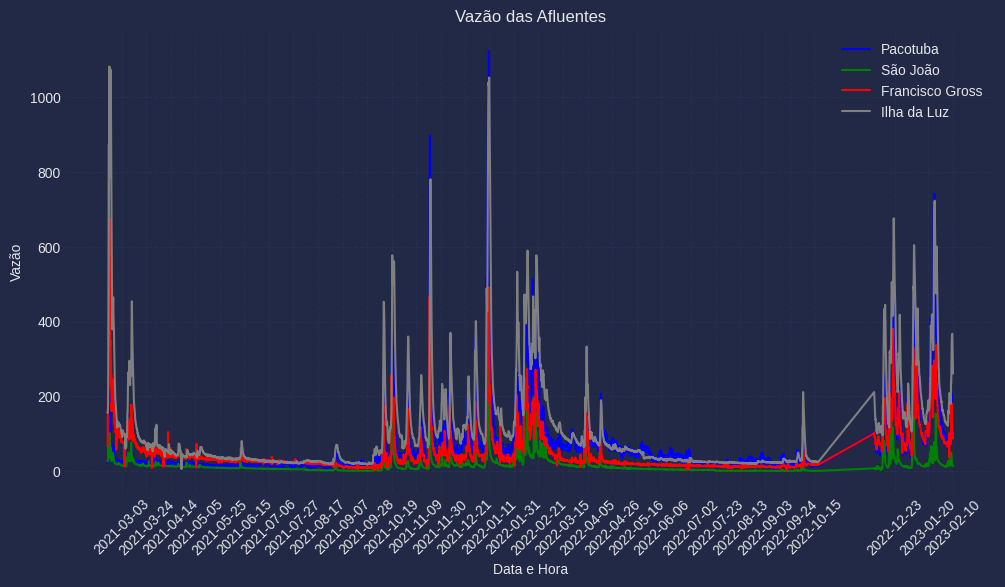

In [38]:
def plot_flow():
    # Crie um gráfico de linha
    plt.figure(figsize=(12, 6))  # Defina o tamanho da figura

    # Plote todas as métricas no mesmo subplot com cores diferentes
    sns.lineplot(data=dataset, x='data_hora', y='pacotuba', label='Pacotuba', color='blue')
    sns.lineplot(data=dataset, x='data_hora', y='sao_joao', label='São João', color='green')
    sns.lineplot(data=dataset, x='data_hora', y='francisco_gross', label='Francisco Gross', color='red')
    sns.lineplot(data=dataset, x='data_hora', y='ilha_da_luz', label='Ilha da Luz', color='grey')


    # Configure os rótulos dos eixos
    plt.xlabel('Data e Hora')
    plt.ylabel('Vazão')

    # Defina o título do gráfico
    plt.title('Vazão das Afluentes')

    # Rotacione os rótulos do eixo x para melhor visualização
    plt.xticks(rotation=45)

    n = 500  # A cada n pontos
    xticks = dataset.iloc[::n]['data_hora']
    plt.xticks(xticks, rotation=45)

    # Adicione uma grade de fundo
    plt.grid(True, linestyle='--', alpha=0.6)

    # Exiba uma legenda
    plt.legend()

    # Exiba o gráfico
    plt.show()

plot_flow()